
    
<p style="font-family:Calibri; font-weight:bold; letter-spacing: 2px; font-size:250%; text-align:left;padding: 0px; border-bottom: 3px solid #003300"><b>About the Dataset</b></p>
Phishing emails have become a significant threat to individuals and organizations worldwide. These deceptive emails aim to trick recipients into divulging sensitive information or performing harmful actions. Detecting and preventing phishing emails is crucial to safeguarding personal and financial security. In recent years, machine learning techniques have emerged as a promising approach to combat this growing menace.
The dataset specifies the email text body the type of emails which can be used to detect phishing emails by extensive analytics of the email text and classifying those using machine learning


    
<p style="font-family:Calibri; font-weight:bold; letter-spacing: 2px; font-size:250%; text-align:left;padding: 0px; border-bottom: 3px solid #003300"><b>Exploring the Dataset</b></p>

In this notebook, we will dive into the exciting world of data exploration and analysis. We have a collection of diverse datasets at our disposal, ranging from numerical data to text and images. Through a series of Python code and visualizations, we will uncover valuable insights, patterns, and trends hidden within the data.

The goals of this notebook are as follows:
- Understand the structure and format of the datasets
- Perform data cleaning and preprocessing
- Conduct exploratory data analysis (EDA) to gain initial insights
- Visualize the data using various plots and charts
- Identify correlations and relationships between variables
- Extract meaningful information to inform further analysis or decision-making

Throughout the notebook, we will use popular Python libraries such as Pandas, NumPy, and Matplotlib to manipulate and visualize the data. Additionally, we may leverage specialized libraries depending on the nature of the datasets, such as Seaborn for statistical visualization or NLTK for natural language processing.

So, let's get started on our journey of exploring these fascinating datasets and uncovering the secrets they hold!
    


<div style="display: flex; justify-content: center;">
  <img src="https://media.tenor.com/SRy6HR5ibvsAAAAC/phishing-phisher.gif" alt="Your GIF" width="300" height="200" />
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df= pd.read_csv("/kaggle/input/phishingemails/Phishing_Email.csv")
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [3]:
df_safe_email = df[df['Email Type'] == "Safe Email"]
df_phishing_email = df[df['Email Type'] == "Phishing Email"]

In [4]:
df.isna().sum()

Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

In [5]:
nan_rows = df[df.isna().any(axis=1)]
nan_rows

,Unnamed: 0,Email Text,Email Type
31,31,NaN,Phishing Email
387,387,NaN,Phishing Email
1883,1883,NaN,Phishing Email
2049,2049,NaN,Phishing Email
2451,2451,NaN,Phishing Email
2972,2972,NaN,Phishing Email
3627,3627,NaN,Phishing Email
3806,3806,NaN,Phishing Email
5763,5763,NaN,Phishing Email
6299,6299,NaN,Phishing Email


In [6]:
df_safe_email.isna().sum()

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64

In [7]:
df_phishing_email.isna().sum()

Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

In [8]:
df = df.dropna()
print(df.isna().sum())

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64


In [9]:
print(df['Email Text'].iloc[0])

re : 6 . 1100 , disc : uniformitarianism , re : 1086 ; sex / lang dick hudson 's observations on us use of 's on ' but not 'd aughter ' as a vocative are very thought-provoking , but i am not sure that it is fair to attribute this to " sons " being " treated like senior relatives " . for one thing , we do n't normally use ' brother ' in this way any more than we do 'd aughter ' , and it is hard to imagine a natural class comprising senior relatives and 's on ' but excluding ' brother ' . for another , there seem to me to be differences here . if i am not imagining a distinction that is not there , it seems to me that the senior relative terms are used in a wider variety of contexts , e . g . , calling out from a distance to get someone 's attention , and hence at the beginning of an utterance , whereas 's on ' seems more natural in utterances like ' yes , son ' , ' hand me that , son ' than in ones like ' son ! ' or ' son , help me ! ' ( although perhaps these latter ones are not compl

In [10]:
df.shape

(18634, 3)

In [11]:
email_type_counts = df['Email Type'].value_counts()
print(email_type_counts)

Email Type
Safe Email        11322
Phishing Email     7312
Name: count, dtype: int64


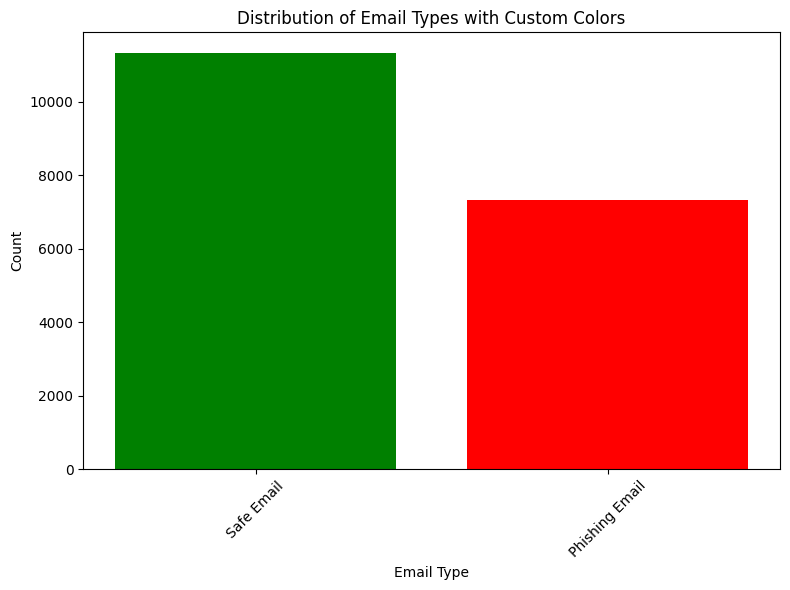

In [12]:
# Create the bar chart
# Create a list of unique email types
unique_email_types = email_type_counts.index.tolist()

# Define a custom color map 
color_map = {
    'Phishing Email': 'red',
    'Safe Email': 'green',}

# Map the colors to each email type
colors = [color_map.get(email_type, 'gray') for email_type in unique_email_types]

# Create the bar chart with custom colors
plt.figure(figsize=(8, 6))
plt.bar(unique_email_types, email_type_counts, color=colors)
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Email Types with Custom Colors')
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()

# Undersampling

In [13]:
Safe_Email = df[df["Email Type"]== "Safe Email"]
Phishing_Email = df[df["Email Type"]== "Phishing Email"]
Safe_Email = Safe_Email.sample(Phishing_Email.shape[0])

In [14]:
Safe_Email.shape,Phishing_Email.shape

((7312, 3), (7312, 3))

In [15]:
Data= pd.concat([Safe_Email, Phishing_Email], ignore_index = True)
Data.head()

,Unnamed: 0,Email Text,Email Type
0,17700,"On Tue, 2002-08-20 at 12:10, John P. Looney wr...",Safe Email
1,15811,"URL: http://www.newsisfree.com/click/-0,859765...",Safe Email
2,11601,URL: http://www.aaronsw.com/weblog/000625\nDat...,Safe Email
3,9638,the linguistic review 15 / 2 - 3 ( 1998 ) spec...,Safe Email
4,12149,short positions through monday el paso lending...,Safe Email


In [16]:
Data.isna().sum()

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64

In [17]:
X = Data["Email Text"].values
y = Data["Email Type"].values
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# define the Classifier
classifier = Pipeline([("tfidf",TfidfVectorizer() ),("classifier",RandomForestClassifier(n_estimators=10))])

In [19]:
classifier.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

In [20]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
y_pred = classifier.predict(x_test)
accuracy_score(y_test,y_pred)

0.9314038286235187

# Cara Penggunaan

In [21]:
new_text = ["Well well weell"]
predictions = classifier.predict(new_text)

In [22]:
predictions

array(['Phishing Email'], dtype=object)

# SVM

In [23]:
from sklearn.svm import SVC

SVM = Pipeline([("tfidf", TfidfVectorizer()),("SVM", SVC(C = 100, gamma = "auto"))])

In [24]:
SVM.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('SVM', SVC(C=100, gamma='auto'))])

In [25]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
s_ypred = SVM.predict(x_test)
accuracy_score(y_test,s_ypred )

0.4990884229717411

# Using K-Fold and XGBoost

In [26]:
def read_data(file_path):
    data = pd.read_csv(file_path, encoding='latin-1')
    data.dropna(inplace=True)

    label_encoder = LabelEncoder()
    T_vectorizer = TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 2), max_features=5000)

    X = data['Email Text'].values
    y = data['Email Type'].values

    for i in range(len(y)):
        if y[i] == 'Phishing Email':
            y[i] = 1
        else:
            y[i] = 0

    y = label_encoder.fit_transform(y)
    return X, y


def print_report(y_val, y_pred, fold):
    print(f'Fold: {fold}')
    print(f'Accuracy Score: {accuracy_score(y_val, y_pred)}')
    print(f'Confusion Matrix: \n {confusion_matrix(y_val, y_pred)}')
    print(f'Classification Report: \n {classification_report(y_val, y_pred)}')

In [27]:
data = pd.read_csv('/kaggle/input/phishingemails/Phishing_Email.csv')
print(data.head())
print(data['Email Type'].value_counts())

   Unnamed: 0                                         Email Text  \
0           0  re : 6 . 1100 , disc : uniformitarianism , re ...   
1           1  the other side of * galicismos * * galicismo *...   
2           2  re : equistar deal tickets are you still avail...   
3           3  \nHello I am your hot lil horny toy.\n    I am...   
4           4  software at incredibly low prices ( 86 % lower...   

       Email Type  
0      Safe Email  
1      Safe Email  
2      Safe Email  
3  Phishing Email  
4  Phishing Email  
Email Type
Safe Email        11322
Phishing Email     7328
Name: count, dtype: int64


In [28]:
X, y = read_data('/kaggle/input/phishingemails/Phishing_Email.csv')
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

print(X.shape, y.shape)

(18634,) (18634,)


In [29]:
fold = 1

for train_index, val_index in kfold.split(X):

  X_train, X_val = X[train_index], X[val_index]
  y_train, y_val = y[train_index], y[val_index]

  vectorizer = TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 3), max_features=10000)
  vectorizer.fit(X_train)

  X_train = vectorizer.transform(X_train)
  X_val = vectorizer.transform(X_val)
  
  model = XGBClassifier(n_estimators=800, learning_rate=0.1, max_depth=4, colsample_bytree=0.2, n_jobs=-1, random_state=42)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)

  print_report(y_val, y_pred, fold)
  fold += 1

Fold: 1
Accuracy Score: 0.9691440837134424
Confusion Matrix: 
 [[2115   94]
 [  21 1497]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97      2209
           1       0.94      0.99      0.96      1518

    accuracy                           0.97      3727
   macro avg       0.97      0.97      0.97      3727
weighted avg       0.97      0.97      0.97      3727

Fold: 2
Accuracy Score: 0.9702173329755835
Confusion Matrix: 
 [[2196   83]
 [  28 1420]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.98      2279
           1       0.94      0.98      0.96      1448

    accuracy                           0.97      3727
   macro avg       0.97      0.97      0.97      3727
weighted avg       0.97      0.97      0.97      3727

Fold: 3
Accuracy Score: 0.9653877112959485
Confusion Matrix: 
 [[2174   86]
 [  43 1424]]
Classification Report: 
  

In [30]:
X_train[1]

<1x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 52 stored elements in Compressed Sparse Row format>

# Cara Penggunaan
1 = "Phising Email"

0 = "Safe Email"

In [31]:
new_text = ["Hello this is definetly not a scam"]

# Transform the new text using the same vectorizer
new_text_transformed = vectorizer.transform(new_text)

# Make predictions
predictions = model.predict(new_text_transformed)

print(predictions)

[1]


## Using Hyperparameter Tuning with Boosting Algorithms

Boosting algorithms, such as AdaBoost, Gradient Boosting, and XGBoost, are powerful techniques used in machine learning to improve model performance and predictive accuracy. While boosting algorithms offer great potential, their effectiveness relies heavily on carefully selecting and tuning hyperparameters.

Hyperparameter tuning refers to the process of finding the optimal values for the hyperparameters of a model. Boosting algorithms have several hyperparameters that control various aspects of the boosting process, such as the number of weak learners, learning rate, maximum tree depth, and regularization parameters.

Here are some reasons why hyperparameter tuning is crucial when using boosting algorithms:

1. **Improved Model Performance**: By fine-tuning the hyperparameters, we can achieve better model performance in terms of accuracy, precision, recall, and overall predictive power. Finding the right combination of hyperparameter values can help boost the model's effectiveness in capturing complex patterns and avoiding overfitting.

2. **Controlled Model Complexity**: Boosting algorithms can be prone to overfitting if the hyperparameters are not properly set. Hyperparameter tuning allows us to control the complexity of the model and strike a balance between underfitting and overfitting. By finding the optimal values, we can ensure a model that generalizes well to unseen data.

3. **Efficient Resource Utilization**: Boosting algorithms can be computationally expensive, especially when dealing with large datasets or complex models. Hyperparameter tuning helps in optimizing the resources utilized by the model. By selecting the right hyperparameter values, we can achieve a good trade-off between model performance and computational efficiency.

4. **Adaptability to Different Datasets**: Different datasets may require different hyperparameter settings to achieve optimal performance. Hyperparameter tuning allows us to adapt the boosting algorithm to the specific characteristics of our dataset. By systematically searching and experimenting with different hyperparameter values, we can find the best configuration for each specific use case.

In this notebook, we will explore various techniques and methodologies for hyperparameter tuning with boosting algorithms. By leveraging these techniques, we aim to enhance the performance and robustness of our models, ultimately leading to more accurate predictions and valuable insights.

Let's dive into the world of hyperparameter tuning with boosting algorithms and unlock their full potential!
